In [79]:
import os
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import openai
import pandas as pd

from dotenv import load_dotenv

load_dotenv()

openai.api_key = os.getenv('OPENAI_API_KEY')
openai.organization = os.getenv('ORGANIZATION_ID')

embedding_words = pd.DataFrame([['Arabic', 'الذكاء الصناعي'],
 ['Bengali', 'কৃত্রিম বুদ্ধিমত্তা'],
 ['Chinese', '人工智能'],
 ['Dutch', 'Kunstmatige intelligentie'],
 ['French', 'Intelligence artificielle'],
 ['German', 'Künstliche Intelligenz'],
 ['Greek', 'Τεχνητή νοημοσύνη'],
 ['Hebrew', 'בינה מלאכותית'],
 ['Hindi', 'कृत्रिम बुद्धि'],
 ['Indonesian', 'Kecerdasan Buatan'],
 ['Italian', 'Intelligenza artificiale'],
 ['Japanese', '人工知能'],
 ['Korean', '인공 지능'],
 ['Persian', 'هوش مصنوعی'],
 ['Polish', 'Sztuczna inteligencja'],
 ['Portuguese', 'Inteligência artificial'],
 ['Russian', 'Искусственный интеллект'],
 ['Spanish', 'Inteligencia artificial'],
 ['Swahili', 'Akili bandia'],
 ['Turkish', 'Yapay zeka'],
 ['Afrikaans', 'Kunsmatige intelligensie'],
 ['Albanian', 'Intelegjenca artificiale'],
 ['Armenian', 'Արքայական բանականություն'],
 ['Azerbaijani', 'Süni intellekt'],
 ['Basque', 'Inteligentzia artifizial'],
 ['Belarusian', 'Штучны інтэлект'],
 ['Bosnian', 'Veštačka inteligencija'],
 ['Bulgarian', 'Изкуствен интелект'],
 ['Croatian', 'Umjetna inteligencija'],
 ['Czech', 'Umělá inteligence'],
 ['Danish', 'Kunstig intelligens'],
 ['Estonian', 'Tehisintellekt'],
 ['Filipino', 'Artipisyal na inteligensya'],
 ['Finnish', 'Tekoäly'],
 ['Georgian', 'ხელოვნური ჭკვიანდი'],
 ['Hungarian', 'Mesterséges intelligencia'],
 ['Icelandic', 'Gervigreind'],
 ['Irish', 'Intleacht shaorga'],
 ['Lithuanian', 'Dirbtinis intelektas'],
 ['Mongolian', 'Хиймэл оюун']], columns=['language', 'word_AI'])

embedding_words

,language,word_AI
0,Arabic,الذكاء الصناعي
1,Bengali,কৃত্রিম বুদ্ধিমত্তা
2,Chinese,人工智能
3,Dutch,Kunstmatige intelligentie
4,French,Intelligence artificielle
5,German,Künstliche Intelligenz
6,Greek,Τεχνητή νοημοσύνη
7,Hebrew,בינה מלאכותית
8,Hindi,कृत्रिम बुद्धि
9,Indonesian,Kecerdasan Buatan


In [93]:
#embedding_data = openai.Embedding.create(input=list(embedding_words.word_AI), model="text-embedding-ada-002")['data']
#embeddings = [e["embedding"] for e in embedding_data]
#np.savetxt('./artificial-intelligence.emb', embeddings)
embeddings = np.loadtxt('./artificial-intelligence.emb')
embeddings.shape


(40, 1536)

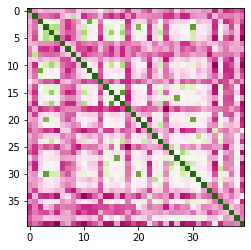

In [94]:
plt.imshow(embeddings @ embeddings.T, cmap='PiYG')

In [111]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

pca.fit(embeddings[:20])

embedding_transform = pca.transform(embeddings[:40])

print(pca.explained_variance_ratio_)

embedding_transform[:, :2]


[0.22174413 0.0897209  0.08639565 0.0753708  0.06947998]


array([[ 0.13259947,  0.20670488],
       [ 0.34126568, -0.07378092],
       [-0.15154493,  0.20175805],
       [-0.19320406, -0.04154296],
       [-0.20740195, -0.12910891],
       [-0.20627264, -0.03519767],
       [ 0.2079442 ,  0.02101016],
       [ 0.29936264, -0.07966107],
       [ 0.31930542, -0.098534  ],
       [ 0.11319036,  0.02212024],
       [-0.21448045, -0.10232469],
       [-0.1048416 ,  0.25287449],
       [-0.09438531,  0.145402  ],
       [ 0.25653221,  0.17776793],
       [-0.14171085, -0.03545026],
       [-0.24180564, -0.10476321],
       [-0.07622977,  0.05706049],
       [-0.24635286, -0.13400587],
       [ 0.21475074, -0.24065008],
       [-0.00672065, -0.00967862],
       [-0.06083543, -0.04784783],
       [-0.03083023, -0.074552  ],
       [ 0.18883018,  0.00402711],
       [ 0.0436734 , -0.02196278],
       [-0.1123191 , -0.10571242],
       [ 0.09446413,  0.06810931],
       [-0.04319292, -0.06847474],
       [ 0.00827251,  0.05897269],
       [-0.0856221 ,

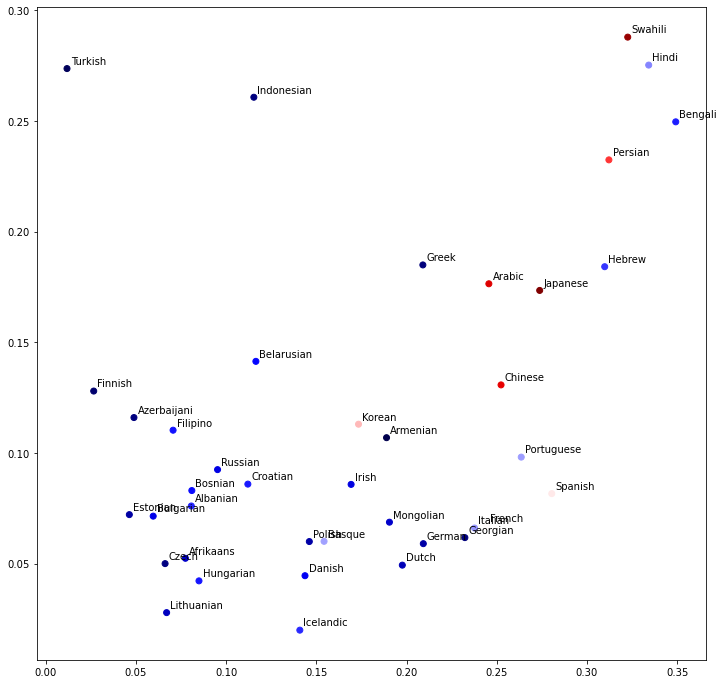

In [145]:
fig, ax = plt.subplots(figsize=(12,12))

X = LA.norm(embedding_transform.T[:2], axis=0)
Y = LA.norm(embedding_transform.T[2:4], axis=0)
C = LA.norm(embedding_transform.T[1:2], axis=0)

ax.scatter(X, Y, c=C, cmap='seismic')

coords = np.vstack([X, Y]).T

for idx, name in enumerate(embedding_words.language):
    ax.annotate(name, coords[idx] + (0.002, 0.002))

array([0.13259947, 0.26518347])